In [ ]:
# Name: Anubhav Kumar Tiwary

# **Car Price Prediction Leveraging Machine Learning**

## Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Load and Inspect Data

In [3]:
data = pd.read_csv('car data.csv')

In [4]:
# Display the first 5 rows
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# Display the first 5 rows
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [6]:
# Shape of dataset
data.shape

(301, 9)

In [7]:
# Dataset shape
print("Number of Rows:", data.shape[0])
print("Number of Columns:", data.shape[1])

Number of Rows: 301
Number of Columns: 9


In [8]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
# Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
# Check for null values
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
# Statistical summary
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Data Preprocessing

In [12]:
data.head(1)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0


In [13]:
!pip install datetime


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import datetime

In [15]:
date_time = datetime.datetime.now()

In [16]:
print(date_time)

2024-11-22 17:30:55.323094


In [17]:
data['Age'] = date_time.year - data['Year']

In [18]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [19]:
data.drop('Year', axis=1, inplace=True)

In [20]:
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


## Outlier Removal

In [21]:
import seaborn as sns

<Axes: xlabel='Selling_Price'>

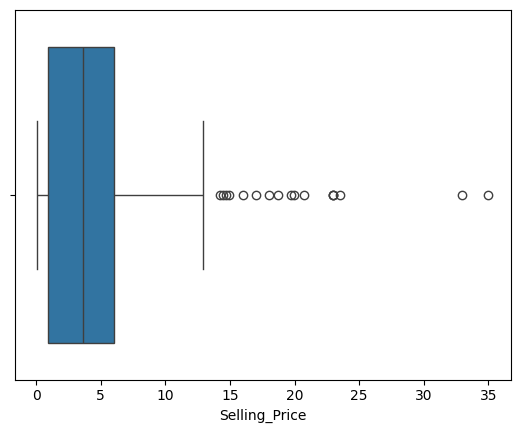

In [22]:
sns.boxplot(x = data['Selling_Price'])

In [23]:
sorted(data['Selling_Price'], reverse=True)

[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.6

In [24]:
data = data[~(data['Selling_Price'] >= 33.0) & (data['Selling_Price'] <= 35.0)]

In [25]:
data.shape

(299, 9)

## Encoding the Categorical Columns

In [26]:
data.head(1)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10


In [27]:
data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [28]:
data['Fuel_Type'] = data['Fuel_Type'].map({'Petrol': 0, 'Diesel': 1, 'CNG': 2})

In [29]:
data['Fuel_Type'].unique()

array([0, 1, 2], dtype=int64)

In [30]:
data['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [31]:
data['Seller_Type'] = data['Seller_Type'].map({'Dealer': 0, 'Individual': 1})

In [32]:
data['Seller_Type'].unique()

array([0, 1], dtype=int64)

In [33]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [34]:
data['Transmission'] = data['Transmission'].map({'Manual': 0, 'Automatic': 1})

In [35]:
data['Transmission'].unique()

array([0, 1], dtype=int64)

In [36]:
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,0,0,0,10
1,sx4,4.75,9.54,43000,1,0,0,0,11
2,ciaz,7.25,9.85,6900,0,0,0,0,7
3,wagon r,2.85,4.15,5200,0,0,0,0,13
4,swift,4.60,6.87,42450,1,0,0,0,10


## Store Feature Matrix in X and Response (Target) in Vector Y

In [37]:
X = data.drop(['Car_Name', 'Selling_Price'], axis=1)
y = data['Selling_Price']

In [38]:
X

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,5.59,27000,0,0,0,0,10
1,9.54,43000,1,0,0,0,11
2,9.85,6900,0,0,0,0,7
3,4.15,5200,0,0,0,0,13
4,6.87,42450,1,0,0,0,10
...,...,...,...,...,...,...,...
296,11.60,33988,1,0,0,0,8
297,5.90,60000,0,0,0,0,9
298,11.00,87934,0,0,0,0,15
299,12.50,9000,1,0,0,0,7


In [39]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

## Splitting the Dataset into Training Set and Testing Set

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

## Import the Models

In [42]:
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,0,0,0,10
1,sx4,4.75,9.54,43000,1,0,0,0,11
2,ciaz,7.25,9.85,6900,0,0,0,0,7
3,wagon r,2.85,4.15,5200,0,0,0,0,13
4,swift,4.60,6.87,42450,1,0,0,0,10


In [43]:
!pip install xgboost


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

## Model Training

In [45]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [46]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [47]:
xgb = GradientBoostingRegressor()
xgb.fit(X_train, y_train)

GradientBoostingRegressor()

In [48]:
xg = XGBRegressor()
xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [49]:
y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = xgb.predict(X_test)
y_pred4 = xg.predict(X_test)

## Evaluating the Algorithm

In [50]:
from sklearn import metrics

In [51]:
score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4 = metrics.r2_score(y_test, y_pred4)

In [52]:
print(score1,score2,score3,score4)

0.8865712161079029 0.9627346722172764 0.9617755973091485 0.9576286242677039


In [53]:
final_data = pd.DataFrame({'Models': ['LR', 'RF', 'GB', 'XG'],
             'R2_Score': [score1,score2,score3,score4]})

In [54]:
final_data

,Models,R2_Score
0,LR,0.886571
1,RF,0.962735
2,GB,0.961776
3,XG,0.957629


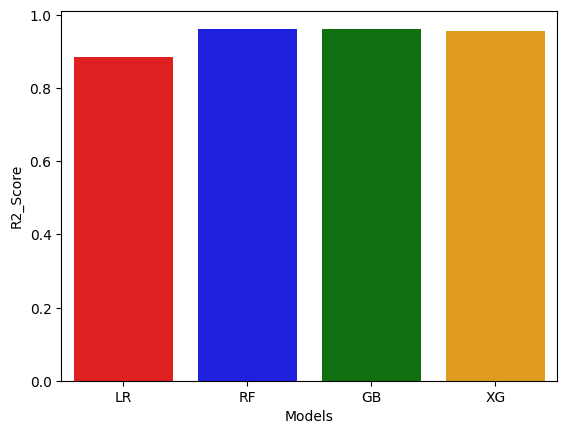

In [55]:
custom_colors = ['red', 'blue', 'green', 'orange']
sns.barplot(x='Models', y='R2_Score', data=final_data, palette=custom_colors)
plt.show()

## Save the Model

In [56]:
rf = RandomForestRegressor()
rf_final = rf.fit(X, y)

In [57]:
import pickle as pk

In [58]:
pk.dump(rf_final, open('CPP_leveraging_ML.pkl', 'wb'))

## Prediction on New Data

In [59]:
import pandas as pd
data_new = pd.DataFrame({
    'Present_Price':11.00,
    'Kms_Driven':87934,
    'Fuel_Type':0,
    'Seller_Type':0,
    'Transmission':0,
    'Owner':0,
    'Age':8
},index=[0])

In [60]:
print(rf_final.predict(data_new))

[7.5058]


## Graphical User Interface (GUI)

In [61]:
from tkinter import *
import joblib
import pandas as pd
from tkinter import messagebox

# Function to handle prediction
def show_entry_fields():
    try:
        # Fetching user inputs
        p1 = float(e1.get())  # Present_Price
        p2 = float(e2.get())  # Kms_Driven
        p3 = int(e3.get())    # Fuel_Type (0 = Petrol, 1 = Diesel, 2 = CNG)
        p4 = int(e4.get())    # Seller_Type (0 = Dealer, 1 = Individual)
        p5 = int(e5.get())    # Transmission (0 = Manual, 1 = Automatic)
        p6 = int(e6.get())    # Owner (0 = First Owner, 1 = Second Owner, etc.)
        p7 = int(e7.get())    # Age of the car
        
        # Loading the pre-trained model
        model = joblib.load('CPP_leveraging_ML.pkl')

        # Creating the input data for prediction
        data_new = pd.DataFrame({
            'Present_Price': [p1],
            'Kms_Driven': [p2],
            'Fuel_Type': [p3],
            'Seller_Type': [p4],
            'Transmission': [p5],
            'Owner': [p6],
            'Age': [p7]
        })
        
        # Predicting the car price
        result = model.predict(data_new)
        
        # Showing the result in the UI
        Label(master, text="Predicted Car Purchase Amount:").grid(row=8, column=0)
        Label(master, text=f"₹{result[0]:.2f} Lakhs").grid(row=8, column=1)
        print("Predicted Car Purchase Amount:", result[0])

    except ValueError as e:
        messagebox.showerror("Input Error", "Please make sure all inputs are correct and in the right format.")
    except Exception as e:
        messagebox.showerror("Error", f"An unexpected error occurred: {e}")

# Creating the Tkinter window
master = Tk()
master.title("Car Price Prediction Using Machine Learning")

# Title Label
label = Label(master, text="Car Price Prediction Using Machine Learning", bg="black", fg="white")
label.grid(row=0, columnspan=2)

# Labels for user inputs
Label(master, text="Present_Price (in lakhs)").grid(row=1)
Label(master, text="Kms_Driven (in km)").grid(row=2)
Label(master, text="Fuel_Type (0=Petrol, 1=Diesel, 2=CNG)").grid(row=3)
Label(master, text="Seller_Type (0=Dealer, 1=Individual)").grid(row=4)
Label(master, text="Transmission (0=Manual, 1=Automatic)").grid(row=5)
Label(master, text="Owner (0=First Owner, 1=Second Owner, etc.)").grid(row=6)
Label(master, text="Age (in years)").grid(row=7)

# Entry fields for user inputs
e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)

# Placing the input fields in the grid
e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)

# Button to trigger prediction
Button(master, text='Predict Price', command=show_entry_fields).grid(row=9, columnspan=2)

# Start the GUI loop
mainloop()